In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A-Insertion des données

In [79]:
billet=pd.read_csv("C:/Users/hotsa/Downloads/projetDATANalyst/projet10/billets.csv", sep = ';')
billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [80]:
## imputer les valeurs manquantes. imputer = remplacer les données par d'autre données.
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [81]:
## supression des données ou on n'a pas de valeurs pour margin_law
Imputbillet=billet[billet.margin_low.notnull()]
Imputbillet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [82]:
## on indique que Y est la variable que l'on cherche à predire
## (double crochet pour garder le type qui est dataframe)
Y=Imputbillet[["margin_low"]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   margin_low  1463 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB


# B-Matrice de correlation pour les predictors (X)

In [83]:
## on cherche à  predire marginlaw avec le reste des données des variables que nous avons
Predictors=Imputbillet.drop(columns=["margin_low","is_genuine"])
Predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1463 non-null   float64
 1   height_left   1463 non-null   float64
 2   height_right  1463 non-null   float64
 3   margin_up     1463 non-null   float64
 4   length        1463 non-null   float64
dtypes: float64(5)
memory usage: 68.6 KB


### La Colinéralité (premiere hypothèses de validité)

In [84]:
## la colineralité
Predictors.corr()

,diagonal,height_left,height_right,margin_up,length
diagonal,1.000000,0.018265,-0.019428,-0.059147,0.100758
height_left,0.018265,1.000000,0.235132,0.243812,-0.314344
height_right,-0.019428,0.235132,1.000000,0.306867,-0.404272
margin_up,-0.059147,0.243812,0.306867,1.000000,-0.521139
length,0.100758,-0.314344,-0.404272,-0.521139,1.000000


<AxesSubplot:>

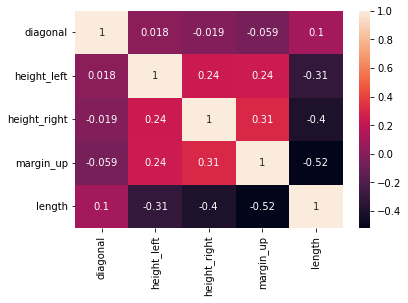

In [85]:
sns.heatmap(data=Predictors.corr(),annot=True)

### Variance Inflation Factor

In [86]:
## VIF:multicolinéarité :
import statsmodels.api as sm

Predictors1 = sm.add_constant(data=Predictors)
Predictors1.head()


C:\Users\hotsa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,diagonal,height_left,height_right,margin_up,length
0,1.0,171.81,104.86,104.95,2.89,112.83
1,1.0,171.46,103.36,103.66,2.99,113.09
2,1.0,172.69,104.48,103.50,2.94,113.16
3,1.0,171.36,103.91,103.94,3.01,113.51
4,1.0,171.73,104.28,103.46,3.48,112.54


In [87]:
## le VIF moyen
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = variance_inflation_factor(exog=Predictors1.values, exog_idx=0)
vif

590198.2388828538

In [88]:
## c'est le VIF pour chaqu'une des variables.
## il y a pas de colinéralité entre les variables
ivaricor = np.linalg.inv(a = Predictors.corr())
ivaricor = pd.DataFrame(data=ivaricor, index=Predictors.columns, columns=Predictors.columns)
ivaricor

,diagonal,height_left,height_right,margin_up,length
diagonal,1.013613,-0.055282,-0.020749,0.018048,-0.118490
height_left,-0.055282,1.138261,-0.133202,-0.107920,0.253285
height_right,-0.020749,-0.133202,1.230115,-0.147994,0.380395
margin_up,0.018048,-0.107920,-0.147994,1.404404,0.636317
length,-0.118490,0.253285,0.380395,0.636317,1.576950


In [89]:
## c'est le jeu de données que l'on creer pour notre imputation de données
Imputbillet=billet[billet.margin_low.notnull()]
Imputbillet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


# C-Modéle de regression linéaire

In [90]:
## on fait le modéle lineaire ici
## lm2 =model lineaire
import statsmodels.api as sm
## Adding constant (No constant is added by the model unless you are using formulas)
Xc = sm.add_constant(Predictors)
lm2 = sm.OLS(Y, Xc)
res = lm2.fit()
res.summary()

## sur python model.fit est 
## comprendre les resultats ci dessous

C:\Users\hotsa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          2.60e-202
Time:                        14:27:23   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382      0.017       4.055      41.935
diagonal        -0.1111      0.041     -2.680      0.007      -0.192      -0.030
height_left      0.1841      0.045      4.113      0.000       0.096       0.272
height_right     0.2571      0.043      5.978      0.000       0.173       0.342
margin_up        0.2562      0.064      3.980      0.000       0.130       0.382
length          -0.4091      0.018    -22.627      0.000      -0.445      -0.374
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.862
Skew:                           0.482   Prob(JB):                     1.53e-21
Kurtosis:                       3.801   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R squared

### L'Homoscédasticité  (deuxieme hypothèses de validité)

In [91]:
import scipy.stats as stats
import statsmodels.api as sm

# calculate the residuals
residuals = res.resid
print(residuals)

0      -0.268676
1      -0.368908
2       0.274067
3      -0.536580
4      -0.537425
          ...   
1495   -0.771741
1496   -0.186887
1497    0.609723
1498    0.361426
1499   -0.209032
Length: 1463, dtype: float64


In [92]:
## perform Bartlett's test on the residuals

import statsmodels.stats.api as sms
test = sms.het_breuschpagan(res.resid, res.model.exog)
test
## la p valeur de se test est la deuximent ligne

(80.16261280174714,
 7.7595352162076815e-16,
 16.892358846152728,
 2.92274965662674e-16)

### Normalité des résidus (troisiéme hypothèses de validité)

In [93]:
import scipy.stats as stats

# perform Shapiro-Wilk test on the residuals
statistic, p_value = stats.shapiro(residuals)

# print the p-value
print("p-value:", p_value)

p-value: 8.536943374437556e-11


(array([  9.,  45., 181., 429., 409., 224., 113.,  36.,  10.,   7.]),
 array([-1.47234153, -1.12802376, -0.78370599, -0.43938822, -0.09507044,
         0.24924733,  0.5935651 ,  0.93788287,  1.28220064,  1.62651842,
         1.97083619]),
 <BarContainer object of 10 artists>)

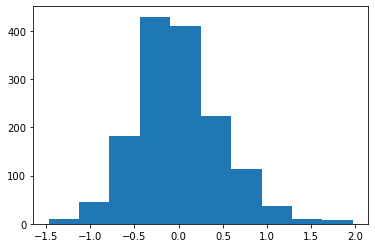

In [94]:
plt.hist(residuals)

In [95]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          2.60e-202
Time:                        14:27:24   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382   

In [96]:
res.predict()

array([4.78867649, 4.13890773, 4.12593262, ..., 4.90027735, 4.80857449,
       4.83903233])

In [97]:
## Pour obtenir les coeff
res.params

const           22.994843
diagonal        -0.111060
height_left      0.184122
height_right     0.257138
margin_up        0.256188
length          -0.409103
dtype: float64

# D-L'imputation

In [98]:
MarManquant=billet[billet.margin_low.isnull()]
MarManquant.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [99]:
## supprimer les colonnes pas necessaires
Predic=MarManquant.drop(columns=["margin_low","is_genuine"])
## ajout de la constante
Predic=sm.add_constant(Predic)
Predic.head()

C:\Users\hotsa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,diagonal,height_left,height_right,margin_up,length
72,1.0,171.94,103.89,103.45,3.25,112.79
99,1.0,171.93,104.07,104.18,3.14,113.08
151,1.0,172.07,103.80,104.38,3.02,112.93
197,1.0,171.45,103.66,103.80,3.62,113.27
241,1.0,171.83,104.14,104.06,3.02,112.36


In [100]:
res.predict(exog=Predic.values)
## chercher a predire

array([4.31852466, 4.39366755, 4.41045663, 4.31901423, 4.6506171 ,
       3.80330831, 4.17973608, 4.12744154, 4.13503418, 4.16053851,
       4.17742026, 3.76855378, 4.05876385, 4.29804709, 4.16060746,
       4.09406453, 4.43984627, 4.47065037, 4.34164322, 4.08041448,
       3.61430588, 4.37181147, 4.09362068, 4.24962896, 3.89374829,
       3.74633265, 4.23741481, 4.71053287, 4.13778022, 5.05027715,
       4.80214523, 5.067584  , 5.04756967, 4.77896717, 5.726993  ,
       5.18586214, 5.14004269])

In [101]:
MarManquant["margin_low"]=res.predict(exog=Predic.values)
MarManquant.head()

C:\Users\hotsa\AppData\Local\Temp/ipykernel_19052/2987818556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MarManquant["margin_low"]=res.predict(exog=Predic.values)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36


In [102]:
## creation d'un nouveau jeu de donnée qui assemble les données manquantes et les données.
BilletF=pd.concat([Imputbillet,MarManquant])
BilletF.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [103]:
##savoir combien de vraies et faux billets
billet.is_genuine.value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [104]:
##  analyse univarié :obtenir les statistiques de bases par colonnes
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# E-Clustering

### Preparation des données que nous allons utilisé pour le clustering

In [105]:
## on creer le jeu de données pour le clustering
## drop permet d'eliminer la colonnes que je n'ai pas besoin
BilletClust=BilletF.drop(columns="is_genuine")
BilletClust.head(),BilletClust.shape

(   diagonal  height_left  height_right  margin_low  margin_up  length
 0    171.81       104.86        104.95        4.52       2.89  112.83
 1    171.46       103.36        103.66        3.77       2.99  113.09
 2    172.69       104.48        103.50        4.40       2.94  113.16
 3    171.36       103.91        103.94        3.62       3.01  113.51
 4    171.73       104.28        103.46        4.04       3.48  112.54,
 (1500, 6))

In [106]:
## standardiser les données:
from sklearn.preprocessing import StandardScaler

## conversion en matric numpy
X=BilletClust.to_numpy()
## clutering; permet de regrouper les pays en fonction des 6 variables en meme temps

In [107]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(BilletClust)

In [108]:
scaled_features

array([[-0.48653957,  2.77412327,  3.16324041,  0.0553898 , -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08198744, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12659056, -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.88579829,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.06517171,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  0.99568639,  0.38201544,
        -1.36227312]])

### Separation des données que l'on va utilisé 

In [109]:
## separer mes jeu de données en 75% et 25%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features,BilletF["is_genuine"],random_state=22)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1125, 6), (375, 6), (1125,), (375,))

   ## 1-Clustering k-means

## Insertion et rappel sur le clustering

In [110]:
from sklearn.cluster import KMeans
## utilisation de la methode silouhette , elle permet de savoir le nombre de cluster pertinent
from sklearn.metrics import silhouette_samples, silhouette_score

## k-means, c'est la deuxiéme methode de clustering:
# A list holds the silhouette coefficients for each k
km_silhouette_coefficients = []

## ramdon_state permet de fixer le nombre aleatoire tiré
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 5):
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(x_train)

    score = silhouette_score(x_train, cluster_labels)
    km_silhouette_coefficients.append(score)

In [111]:
## les coefficients silhouette.
km_silhouette_coefficients


[0.3404234788873669, 0.21127886150760714, 0.19718245718131264]

### L'inertie

In [112]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import numpy as np

inertia = clusterer.inertia_
print("Inertie: ", inertia)

Inertie:  3511.5493795604807


In [113]:
## indique le meilleur coeff silhouette a choisir.
bestclustn = range(2,11)[km_silhouette_coefficients.index(max(km_silhouette_coefficients))]
bestclustn

2

### Perforance du clustering sur les données d'apprentissage

In [114]:
## on fait un  cluterer de test
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(x_train)
cluster_labels
## on voit quels billets corresponds pour chaques clusters

array([1, 0, 1, ..., 1, 1, 1])

In [115]:
## matrice de confusion pour mes clustering, label de cluster vs l'apprentissage
pd.crosstab(index=cluster_labels,columns=y_train)


is_genuine,False,True
row_0,,
0,374,7
1,10,734


### Performance du clustering sur les données de test

In [116]:
Ctest=clusterer.predict(x_test)
Ctest.shape

(375,)

In [117]:
pd.crosstab(index=Ctest,columns=y_test)

is_genuine,False,True
row_0,,
0,114,3
1,2,256


In [118]:
## c'est un exemple de marché learning
pd.crosstab(index=clusterer.predict(x_test),columns=y_test)

is_genuine,False,True
row_0,,
0,114,3
1,2,256


In [119]:
print(x_train)

[[ 3.78900396e-02  3.49632619e-02  9.82104904e-01 -3.84396065e-01
  -1.34408792e+00  9.87461755e-01]
 [ 4.96765952e-01  3.69007165e-01  7.05622938e-01  5.40670753e-01
   5.54625780e-01 -1.94684131e+00]
 [ 1.28341037e+00  3.49632619e-02  7.97783593e-01 -2.04353498e-02
  -5.24188824e-01  5.40439022e-01]
 ...
 [ 8.57311312e-01 -1.06738162e+00 -1.50623279e+00 -5.36046363e-01
  -3.94731071e-01  8.49916299e-01]
 [ 1.02119557e+00  3.02198385e-01  1.21938787e-01 -5.51211393e-01
  -1.77561376e+00  5.06052658e-01]
 [-3.88209022e-01  1.55887155e-03 -1.23822960e-01 -2.63075827e-01
   1.23099938e-01  4.48742051e-01]]


# D-Regression logistique:

In [120]:
from statsmodels.api import Logit

reg_log = Logit(endog=y_train,exog=x_train)# Calculs:
res_log = reg_log.fit()# Resume des resultats:
print(res_log.summary())

Optimization terminated successfully.
         Current function value: 0.053332
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                  0.9169
Time:                        14:27:25   Log-Likelihood:                -59.998
converged:                       True   LL-Null:                       -722.16
Covariance Type:            nonrobust   LLR p-value:                3.448e-284
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2622      0.243      1.078      0.281      -0.214       0.739
x2            -0.6641      0

In [121]:
## supprimer la variable x1 qui est egale a diagonal:
x_train2=x_train[:,1:6]
x_train2


array([[ 3.49632619e-02,  9.82104904e-01, -3.84396065e-01,
        -1.34408792e+00,  9.87461755e-01],
       [ 3.69007165e-01,  7.05622938e-01,  5.40670753e-01,
         5.54625780e-01, -1.94684131e+00],
       [ 3.49632619e-02,  7.97783593e-01, -2.04353498e-02,
        -5.24188824e-01,  5.40439022e-01],
       ...,
       [-1.06738162e+00, -1.50623279e+00, -5.36046363e-01,
        -3.94731071e-01,  8.49916299e-01],
       [ 3.02198385e-01,  1.21938787e-01, -5.51211393e-01,
        -1.77561376e+00,  5.06052658e-01],
       [ 1.55887155e-03, -1.23822960e-01, -2.63075827e-01,
         1.23099938e-01,  4.48742051e-01]])

In [122]:
x_test2=x_test[:,1:6]
x_test2

array([[-1.33461674,  0.61346228, -0.17208565, -0.39473107,  0.80406781],
       [ 0.10177204, -1.07614973, -0.64220157, -0.0495104 ,  0.34558296],
       [-1.56844747,  1.44290818, -1.1123175 , -0.39473107,  0.89576478],
       ...,
       [-1.16759479, -2.39711913, -0.49055127,  0.12309994,  1.43448449],
       [-1.4682343 , -0.73822733, -0.06593044,  0.72723612,  0.63213599],
       [ 0.10177204, -0.40030493, -0.30857092,  0.03679477,  0.72383296]])

In [123]:
reg_log2 = Logit(endog=y_train,exog=x_train2)# Calculs:
res_log2 = reg_log2.fit()# Resume des resultats:
print(res_log2.summary())

Optimization terminated successfully.
         Current function value: 0.053852
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                  0.9161
Time:                        14:27:25   Log-Likelihood:                -60.583
converged:                       True   LL-Null:                       -722.16
Covariance Type:            nonrobust   LLR p-value:                3.192e-285
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6456      0.259     -2.493      0.013      -1.153      -0.138
x2            -0.6404      0

### Le R2

In [124]:
## evalutation: on va predire les valeurs de x_test, ce sont les probabilité qui me renvoie
y_predict= res_log2.predict(x_test2)
y_predict
## transformation de mes probabilité en true ou false
y_predict2=(y_predict>=0.5)
y_predict2

array([ True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True,

In [125]:
##faire ma matrice de confusion y predic 2 vs ytes
pd.crosstab(index=y_predict2,columns=y_test)

is_genuine,False,True
row_0,,
False,115,3
True,1,256


In [126]:
## matrice de confusion
pd.crosstab(index=clusterer.predict(x_test),columns=y_test)

is_genuine,False,True
row_0,,
0,114,3
1,2,256


### R squared

### Test d'accuracy:

In [127]:
from sklearn.metrics import accuracy_score

test_accuracy=accuracy_score(y_test,y_predict2)*100
print('Testing accuracy:',test_accuracy)

Testing accuracy: 98.93333333333332


In [128]:
## on va afficher le rapport de classification: 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict2, digits=6))

              precision    recall  f1-score   support

       False   0.974576  0.991379  0.982906       116
        True   0.996109  0.988417  0.992248       259

    accuracy                       0.989333       375
   macro avg   0.985343  0.989898  0.987577       375
weighted avg   0.989448  0.989333  0.989358       375



# Realiser une analyse predictive

In [137]:
testS=pd.read_csv("C:/Users/hotsa/Downloads/billets_test.csv", sep = ',')
testS

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [138]:
testS=testS.drop(columns=["id","diagonal"])
testS


,height_left,height_right,margin_low,margin_up,length
0,103.95,103.73,4.39,3.09,113.19
1,104.17,104.03,5.27,3.16,111.82
2,103.80,103.75,3.81,3.24,113.39
3,104.08,103.99,5.57,3.30,111.10
4,104.34,104.37,5.00,3.07,111.87


In [139]:

scaler = StandardScaler()
testS1 = scaler.fit_transform(testS)
testS1


array([[-0.63941849, -1.05016441, -0.66063862, -0.93715816,  1.04631132],
       [ 0.55271768,  0.24102134,  0.73017953, -0.1371451 , -0.51858662],
       [-1.4522386 , -0.96408536, -1.57731422,  0.77715555,  1.27476358],
       [ 0.06502561,  0.06886324,  1.20432208,  1.46288103, -1.34101473],
       [ 1.4739138 ,  1.70436519,  0.30345123, -1.16573332, -0.46147355]])

In [140]:
y_predict= res_log2.predict(testS1)
y_predict


array([9.99985977e-01, 1.87163826e-03, 9.99999228e-01, 3.07747946e-07,
       1.84260659e-02])

In [141]:
y_predict=(y_predict>=0.5)
y_predict

array([ True, False,  True, False, False])